각 폴더별 존재하는 4개의 class를 하나로 합친다.    

## To-do
1. [Rule] RGB format (PIL) Color maps are => (255,0,0) Class 01 / (0,255,0) Class 02 / (0,0,255) Class 03 / (255,255,0) Class 04 / else Background  
2. thresholding  each class image  
3. get (row, col)  
4. Class 02 -> Class -> 01 -> Class 03 -> Class 04 순서로 겹치게  
5. Result, Unique values are (255,0,0) / (0,255,0) / (0,0,255) / (255,255,0)




In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot
import sys

from PIL import Image
from lib_torch import help_function

import random
import numpy as np
import random
import configparser
import os
import cv2
import sys
import configparser
import pandas as pd

sys.path.insert(0, './lib_keras/')

from help_functions import load_hdf5
from help_functions import visualize
from help_functions import group_images
from help_functions import show_on_jupyter
from pre_processing import my_preprocessing
from pre_processing import augmentations
from collections import OrderedDict
from PIL import Image







In [41]:
def getLabelClassColRow(label_path, label_info, thr_val = 200):
    '''
    Each label images are BGR format (bcz of cv2 lib)
    
    class01 => Red / (0,0,255)
    Class02 => Green / (0,255,0)
    Class03 => Blue / (255,0,0)
    Class04 => Yellow / (0,255,255)
    
    parameters
        
        label_path : label path (string)

        label_info : label information 
            number of class, height, width, ch
        
    return 
        each label's classes col, row information
        
    '''
    num_class, label_h, label_w, label_ch = label_info
    
    class_cnt = 0
    for count, filename in enumerate(sorted(os.listdir(label_path)), start=0):
        groundTruth_path = label_path +  filename
        if filename == 'Class01.png':
            g_truth = cv2.imread(groundTruth_path)
            g_truth = g_truth[:,:,2] >thr_val # True or False
            class01_row, class01_col = np.nonzero(g_truth)
            class01_info = (class01_row, class01_col)

            class_cnt = class_cnt+1
        elif filename == 'Class02.png':
            g_truth = cv2.imread(groundTruth_path)
            g_truth = g_truth[:,:,1] > thr_val
            class02_row, class02_col = np.nonzero(g_truth)
            class02_info = (class02_row, class02_col)

            class_cnt = class_cnt+1
        elif filename == 'Class03.png':
            g_truth = cv2.imread(groundTruth_path)
            g_truth = g_truth[:,:,0] > thr_val
            class03_row, class03_col = np.nonzero(g_truth)
            class03_info = (class03_row, class03_col)

            class_cnt = class_cnt+1
        elif filename == 'Class04.png':
            '''
            00, 01 => Red (Mistake)
            else => Green 
            
            '''
            g_truth = cv2.imread(groundTruth_path)
            g_truth = g_truth[:,:,1] > thr_val
            
            class04_row, class04_col = np.nonzero(g_truth)
            class04_info = (class04_row, class04_col)

            class_cnt = class_cnt+1

    if class_cnt != 4:
        print('Wrong filename exist')
    
    debug_arrays = np.zeros((label_h, label_w))
    debug_arrays[class01_info] = 255
    #help_function.show_on_jupyter(debug_arrays,'gray')
    
    return class01_info, class02_info, class03_info, class04_info


def combineLabelInfo(save_dir,save_name,label_info,class01_info, class02_info, class03_info, class04_info):
    '''
    parameters
        save dir (str)
        
        save name (str)
        
        label info
            num class, label h, label w , label ch
    
        class information (row, col)
            class row and col informations 
            
    return
        save the combine images
    
    '''
    if os.path.isdir(save_dir) == False:
        os.mkdir(save_dir)
    else:
        print('already exist the folder in this path : {}'.format(save_dir))
        
    num_class, label_h, label_w, label_ch = label_info
    save_img = np.zeros((label_h, label_w, label_ch))
        
    save_img[class02_info] = (0,255,0)
    save_img[class01_info] = (0,0,255)
    save_img[class03_info] = (255,0,0)
    save_img[class04_info] = (0,255,255)
    save_img = np.array(save_img, np.uint8)
    
    cv2.imwrite(save_dir +save_name,save_img)
        
    #help_function.show_on_jupyter(save_img)
    
label_path = './data/inha_oct_20_01_09/train/before_label/'
label_dir = '01/'
save_dir = './data/inha_oct_20_01_09/train/label/'
save_name = '01.png'


label_h = 500
label_w = 760
label_ch = 3
num_class = 4

label_info = (num_class, label_h, label_w, label_ch)

for i in range(20,40):
    if i < 10:
        class01_info,class02_info, class03_info, class04_info = getLabelClassColRow(label_path +'0'+str(i)+'/', label_info)
        combineLabelInfo(save_dir, '0'+str(i)+'.png', label_info, class01_info,class02_info, class03_info, class04_info)
    else:
        class01_info,class02_info, class03_info, class04_info = getLabelClassColRow(label_path +str(i)+'/', label_info)
        combineLabelInfo(save_dir, str(i)+'.png', label_info, class01_info,class02_info, class03_info, class04_info)
    
    

already exist the folder in this path : ./data/inha_oct_20_01_09/train/label/
already exist the folder in this path : ./data/inha_oct_20_01_09/train/label/
already exist the folder in this path : ./data/inha_oct_20_01_09/train/label/
already exist the folder in this path : ./data/inha_oct_20_01_09/train/label/
already exist the folder in this path : ./data/inha_oct_20_01_09/train/label/
already exist the folder in this path : ./data/inha_oct_20_01_09/train/label/
already exist the folder in this path : ./data/inha_oct_20_01_09/train/label/
already exist the folder in this path : ./data/inha_oct_20_01_09/train/label/
already exist the folder in this path : ./data/inha_oct_20_01_09/train/label/
already exist the folder in this path : ./data/inha_oct_20_01_09/train/label/
already exist the folder in this path : ./data/inha_oct_20_01_09/train/label/
already exist the folder in this path : ./data/inha_oct_20_01_09/train/label/
already exist the folder in this path : ./data/inha_oct_20_01_09

In [42]:
for i in range(20,40):
    print(i)

20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [43]:
def totuple(a):
    try:
        return tuple(totuple(i) for i in a)
    except TypeError:
        return a

def make_ordered_mapping(img):
    '''
    parameter 
        img (ch-last format img)
        
    return
        ordered mapping (unique value)
    '''
    unique_val = np.unique(img.reshape(-1, img.shape[2]), axis=0)
    print('unique val : ', unique_val)
    
    ordered_mapping =OrderedDict()
    num_class =0 
    for k in unique_val:
        ordered_mapping[totuple(k)] = num_class
        num_class = num_class+1
        
    
    return ordered_mapping
    

def ch_wise_one_hot_encoding(labels,class_num, mapping):
    '''
    input : patchs (ch first images)
    
    mapping example : 
        mapping = {
            (0,0,0) : 0,
            (255,0,0) : 1,
            (0,0,255) : 2
            }
    
    return patches (num, H, W, class-1)
    '''
    patch_num, c, h, w = labels.shape
    print('label shape : ',labels.shape)
    class_frequency_table = pd.DataFrame(columns=['class_0', 'class_1', 'class_2','class_3','class_4', 'frequency_0', 'frequency_1','frequency_2','frequency_3','frequency_4'])
    
    num_pixels = int(h*w)
    for idx in range(patch_num):
        ch_cnt =0 
        temp_label = labels[idx]
        temp_label = np.transpose(temp_label, (1,2,0))
        #print(np.shape(temp_label))
        
        class_frequency_table.loc[idx] = 0
        
        '''
        mapping 순서 이슈
        '''
        for k in mapping:
            #print('mapping : ',k,'\n',mapping)
            row,col = np.where(np.all(temp_label == k, axis = -1))
            class_pixels = len(row)
            #print('len class pixel : ', len(row))
            
            class_frequency_table.loc[idx,'class_' + str(ch_cnt)] = class_pixels
            class_frequency_table.loc[idx,'frequency_' + str(ch_cnt)] = class_pixels / num_pixels
            ch_cnt = ch_cnt + 1
            
    return class_frequency_table

train_masks = load_hdf5('./data/hdf5_data/inha_oct_5classes/inha_oct_5classes_groundTruth_train.hdf5')
img = Image.open('./data/inha_oct_20_01_09/train/label/00.png')
img = np.asarray(img)
unique_val = np.unique(img.reshape(-1, img.shape[2]), axis=0)
print(unique_val)
mapping = make_ordered_mapping(img)
print(mapping)

class_frequency_table = ch_wise_one_hot_encoding(train_masks,5, mapping)


print(class_frequency_table['frequency_0'].mean())

class_frequency_table


[[  0   0   0]
 [  0   0 255]
 [  0 255   0]
 [255   0   0]
 [255 255   0]]
unique val :  [[  0   0   0]
 [  0   0 255]
 [  0 255   0]
 [255   0   0]
 [255 255   0]]
OrderedDict([((0, 0, 0), 0), ((0, 0, 255), 1), ((0, 255, 0), 2), ((255, 0, 0), 3), ((255, 255, 0), 4)])
label shape :  (40, 3, 500, 760)
0.8324272368421053


,class_0,class_1,class_2,class_3,class_4,frequency_0,frequency_1,frequency_2,frequency_3,frequency_4
0,330732,5915,20660,13455,9238,0.870347,0.015566,0.054368,0.035408,0.024311
1,316647,5484,24603,22703,10563,0.833282,0.014432,0.064745,0.059745,0.027797
2,313253,5170,18724,31071,11782,0.824350,0.013605,0.049274,0.081766,0.031005
3,316597,5889,23193,24746,9575,0.833150,0.015497,0.061034,0.065121,0.025197
4,311853,5606,31061,21575,9905,0.820666,0.014753,0.081739,0.056776,0.026066
5,315253,5825,23426,29485,6011,0.829613,0.015329,0.061647,0.077592,0.015818
6,327243,5576,17246,24913,5022,0.861166,0.014674,0.045384,0.065561,0.013216
7,320554,6444,31222,16614,5166,0.843563,0.016958,0.082163,0.043721,0.013595
8,323130,7300,25418,19963,4189,0.850342,0.019211,0.066889,0.052534,0.011024
9,325692,6643,21877,22502,3286,0.857084,0.017482,0.057571,0.059216,0.008647


In [46]:
print(class_frequency_table['frequency_0'].mean())
print(class_frequency_table['frequency_1'].mean())
print(class_frequency_table['frequency_2'].mean())
print(class_frequency_table['frequency_3'].mean())
print(class_frequency_table['frequency_4'].mean())

0.8324272368421053
0.017181842105263155
0.06036296052631579
0.07072434210526315
0.019303618421052632


(500, 760, 3)


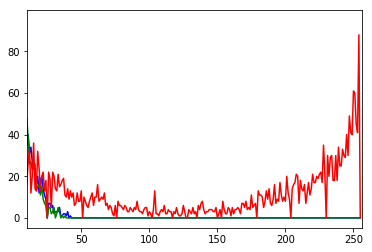

check your parameter
(500, 760)


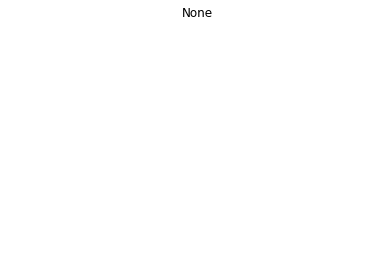

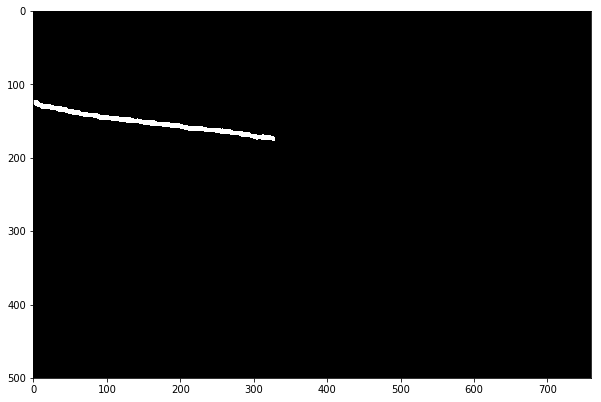

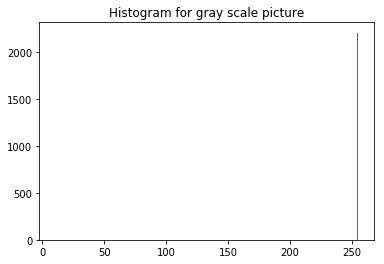

In [32]:
from sklearn.metrics import accuracy_score
import os
import numpy as np
from PIL import Image
from collections import OrderedDict
from sklearn.metrics import jaccard_similarity_score

In [33]:
'''
Array 형태로 저장하는게 맞다

1. 각 dir에서 이미지 불러옴

2. 특정 label을 제외, 모두 0으로 만들고 비교한다

3. 이를 위해서는 특정 label의 row, col이 필요하다

4. 그 후 Flatten하여 비교


'''


label_path = './data/inha_oct_20_01_09/pad_label/'
predict_path = './result/train_test_72_attn_hybridTest/each_results/'

temp = Image.open(label_path+'0.png')
temp2 = Image.open(predict_path+'pred_0_.png')
print(np.shape(temp))
print(np.shape(temp2))

img_height, img_width = np.shape(temp)[0], np.shape(temp)[1]

label_imgs = np.empty((20,img_height,img_width,3))
predict_imgs = np.empty((20,img_height,img_width,3))

for count, filename in enumerate(sorted(os.listdir(label_path)), start=0):
    #print ("original image: " +filename)
    img = Image.open(label_path+filename)
    label_imgs[count] = np.asarray(img)
            
for count, filename in enumerate(sorted(os.listdir(predict_path)), start=0):
    #print ("original image: " +filename)
    img = Image.open(predict_path+filename)
    predict_imgs[count] = np.asarray(img)
    
print(np.shape(label_imgs))
print(np.shape(predict_imgs))


label_imgs01 = np.empty((20,img_height,img_width,3))
predict_imgs01 = np.empty((20,img_height,img_width,3))

label_imgs02 = np.empty((20,img_height,img_width,3))
predict_imgs02 = np.empty((20,img_height,img_width,3))

label_imgs03 = np.empty((20,img_height,img_width,3))
predict_imgs03 = np.empty((20,img_height,img_width,3))

label_imgs04 = np.empty((20,img_height,img_width,3))
predict_imgs04 = np.empty((20,img_height,img_width,3))

mapping = OrderedDict()
mapping[(0,0,0)] = 0
mapping[(255,0,0)] = 1
mapping[(0,255,0)] = 2
mapping[(0,0,255)] = 3
mapping[(255,255,0)] = 4

for i in range(20):
    for k in mapping:
        row,col = np.where(np.all(label_imgs[i] == k, axis = -1))
        p_row,p_col = np.where(np.all(predict_imgs[i] == k, axis = -1))
        if k==(0,0,0):
            pass
        elif k== (255,0,0):
            label_imgs01[i,row,col] = 1
            predict_imgs01[i,p_row,p_col] =1
            
        elif k==(0,255,0):
            label_imgs02[i,row,col] = 1
            predict_imgs02[i,p_row,p_col] =1
            
        elif k==(0,0,255):
            label_imgs03[i,row,col] = 1
            predict_imgs03[i,p_row,p_col] =1
            
        elif k==(255,255,0):
            label_imgs04[i,row,col] = 1
            predict_imgs04[i,p_row,p_col] =1
    


predict_imgs01 = predict_imgs01.reshape(20,-1)
predict_imgs02 = predict_imgs02.reshape(20,-1)
predict_imgs03 = predict_imgs03.reshape(20,-1)
predict_imgs04 = predict_imgs04.reshape(20,-1)

label_imgs01 = label_imgs01.reshape(20,-1)
label_imgs02 = label_imgs02.reshape(20,-1)
label_imgs03 = label_imgs03.reshape(20,-1)
label_imgs04 = label_imgs04.reshape(20,-1)

acc01 = []
acc02 = []
acc03 = []
acc04 = []

jac01 = []
jac02 = []
jac03 = []
jac04 = []


for i in range(20):
    acc01.append(accuracy_score(label_imgs01[i], predict_imgs01[i]))
    acc02.append(accuracy_score(label_imgs02[i], predict_imgs02[i]))
    acc03.append(accuracy_score(label_imgs03[i], predict_imgs03[i]))
    acc04.append(accuracy_score(label_imgs04[i], predict_imgs04[i]))
    
    jac01.append(jaccard_similarity_score(label_imgs01[i], predict_imgs01[i]))
    jac02.append(jaccard_similarity_score(label_imgs02[i], predict_imgs02[i]))
    jac03.append(jaccard_similarity_score(label_imgs03[i], predict_imgs03[i]))
    jac04.append(jaccard_similarity_score(label_imgs04[i], predict_imgs04[i]))

(504, 792, 3)
(504, 792, 3)
(20, 504, 792, 3)
(20, 504, 792, 3)


In [37]:
jac01

[0.9969436427769761,
 0.9123602092352092,
 0.913740580407247,
 0.8634058842392176,
 0.8819669913419913,
 0.9003978274811608,
 0.8916446208112875,
 0.8599787558120892,
 0.8983535754369087,
 0.9226290684624018,
 0.9215743746993748,
 0.9019610790444124,
 0.9952576358826358,
 0.9968108666025333,
 0.996537798621132,
 0.9959866522366523,
 0.9944158850408851,
 0.9960643137726471,
 0.9959515792849126,
 0.9942806036556037]

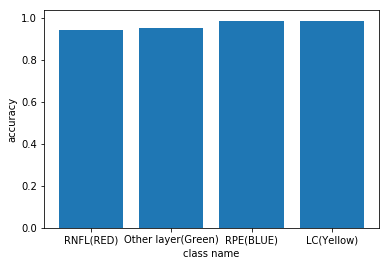

In [38]:
import matplotlib.pyplot as plt

data = [np.mean(acc01), np.mean(acc02), np.mean(acc03), np.mean(acc04)]
items = ['RNFL(RED)','Other layer(Green)', 'RPE(BLUE)', 'LC(Yellow)']

plt.bar(items, data)
plt.xlabel('class name')
plt.ylabel('accuracy')
fig = plt.gcf()
fig.savefig('temp.pdf')

In [39]:
print(np.mean(acc01), np.mean(acc02), np.mean(acc03), np.mean(acc04))

0.941513097242264 0.9496343644781146 0.9827761744428412 0.9862646805355139


In [1]:
new_img_h = ((int(504/72)) +1) * 72
print(new_img_h)

576


In [2]:
72 - (504 % 72)

72

In [3]:
(504-72) %5

2

In [22]:
from PIL import Image
import  numpy as np
import cv2
label_path = './data/inha_oct_20_01_09/pad_label/'
predict_path = './result/train_test_72_attn_hybridTest/each_results/'

temp = Image.open(label_path+'0.png').convert('1')
#temp = temp[:,:,1]
temp2 = Image.open(predict_path+'pred_0_.png')
temp3 = cv2.imread(label_path + '0.png')


print(np.shape(temp))

print(np.shape(temp3))

temp.save('temp.png')

temp = temp.resize((300,500), resample=Image.LANCZOS )



temp.save('resize_temp.png')

temp = temp.resize((500,300), resample=Image.LANCZOS )
temp.save('resze2_temp.png')

temp = Image.open(label_path+'0.png')
temp.save('temp_pil.png')

temp4 = np.asarray(temp)
cv2.imwrite('temp_cv.png',temp4)

temp5 = cv2.resize(temp4,(300,500),interpolation = cv2.INTER_LANCZOS4 )
cv2.imwrite('temp_cv2.png',temp5)


(504, 792)
(504, 792, 3)


True

In [8]:
temp.save('temp.png')

In [3]:
import imgaug as ia
import imgaug.augmenters as iaa
import numpy as np
import cv2



In [ ]:
clear_img = cv2.imread('./data/inha_oct_20_01_09/train/raw_data_01.png')
noise_img = cv2.imread('./data/inha_oct_20_01_09/train/raw_data_01.png')



aug = iaa.imgcorruptlike.ShotNoise(severity=2)
